In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

import cv2
# remove verison errors
import warnings
warnings.filterwarnings('ignore')

In [5]:
import tensorflow as tf

In [6]:
gpu = tf.config.experimental.list_physical_devices('GPU')
for g in gpu:
    tf.config.experimental.set_memory_growth(g, True)
len(gpu) # Check if GPU is available

1

# Reading the Images

glob is a Python module used to find all the file names in a folder that match a specific pattern (like *.jpg for all JPEG images)

    - glob helps you quickly search for files or folders matching a pattern.


In [7]:
normal = glob('/home/yuk/Documents/BigProject/Dataset/Normal/*.png')
tuberculosis = glob('/home/yuk/Documents/BigProject/Dataset/Tuberculosis/*.png')

In [8]:
img_nor = plt.imread(normal[69])
img_tub = cv2.imread(tuberculosis[49])
img_nor.shape , img_tub.shape

((128, 128), (128, 128, 3))

img_nor.shape ---> (512, 512, 3)
img_tub.shape ---> (512, 512, 3)

(Height , Width , Channels)

# Display Images

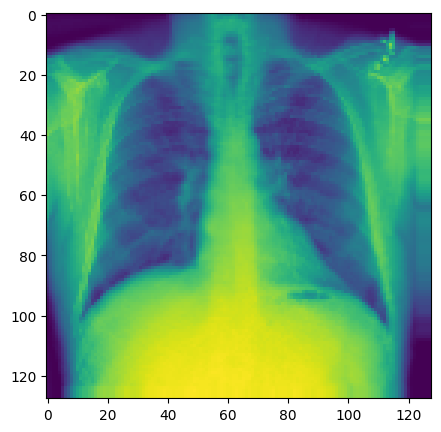

In [9]:
fig , ax = plt.subplots(figsize=(5,5))
ax.imshow(img_nor) # Image of a normal lung without TB  
plt.show()

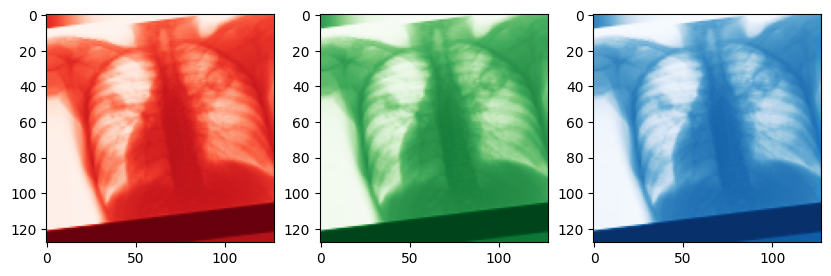

In [10]:
fig, axs = plt.subplots(1 ,3 , figsize=(10, 5))
axs[0].imshow(img_tub[:,:,0], cmap='Reds') 
axs[1].imshow(img_tub[:,:,1], cmap='Greens') 
axs[2].imshow(img_tub[:,:,2], cmap='Blues')
plt.show()  

In [11]:
from skimage import exposure , img_as_float

image1 = img_as_float(img_nor)
image2 = img_as_float(img_tub)

gamma_corrected1 = exposure.adjust_gamma(image1, 0.5)
gamma_corrected2 = exposure.adjust_gamma(image2, 0.5)

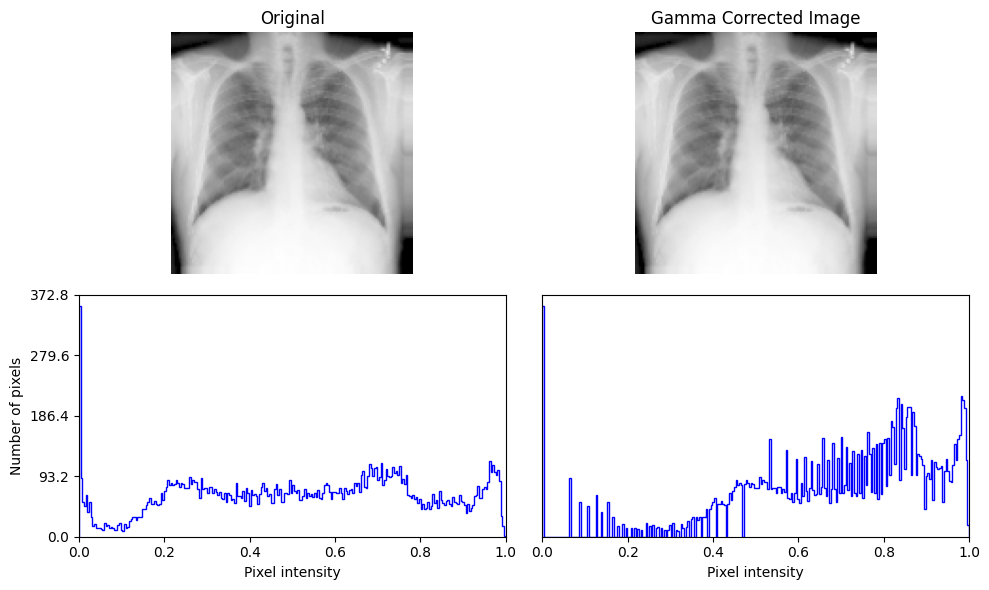

In [12]:
# Display the original and gamma_corrected images side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(gamma_corrected1, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(gamma_corrected1, cmap=plt.cm.gray)
ax[1].set_title('Gamma Corrected Image')
ax[1].set_axis_off()

ax[2].hist(image1.ravel(), bins=256, histtype='step', color='blue')
ax[2].set_xlim(0, 1)
ax[2].set_xlabel('Pixel intensity')
ax[2].set_yticks([])
ax[2].set_ylabel('Number of pixels')
y_min, y_max = ax[2].get_ylim()
ax[2].set_yticks(np.linspace(0, y_max, 5))

ax[3].hist(gamma_corrected1.ravel(), bins=256, histtype='step', color='blue')
ax[3].set_xlim(0, 1)
ax[3].set_xlabel('Pixel intensity')
ax[3].set_yticks([])

plt.tight_layout()
plt.show()

In the normal lung X-ray graph (top image), we can see that the blue line forms three distinct humps or peaks-one small peak at the far left, a medium peak in the middle, and a taller peak on the right. This pattern shows that healthy lungs have a good mix of different brightness levels, representing the natural contrast between air-filled areas (darker) and tissue/bone structures (brighter). After gamma correction, these brightness values spread out into a pattern that looks like a comb with many spikes, but still maintain the overall shape with multiple peaks, showing the lung's normal varied texture.

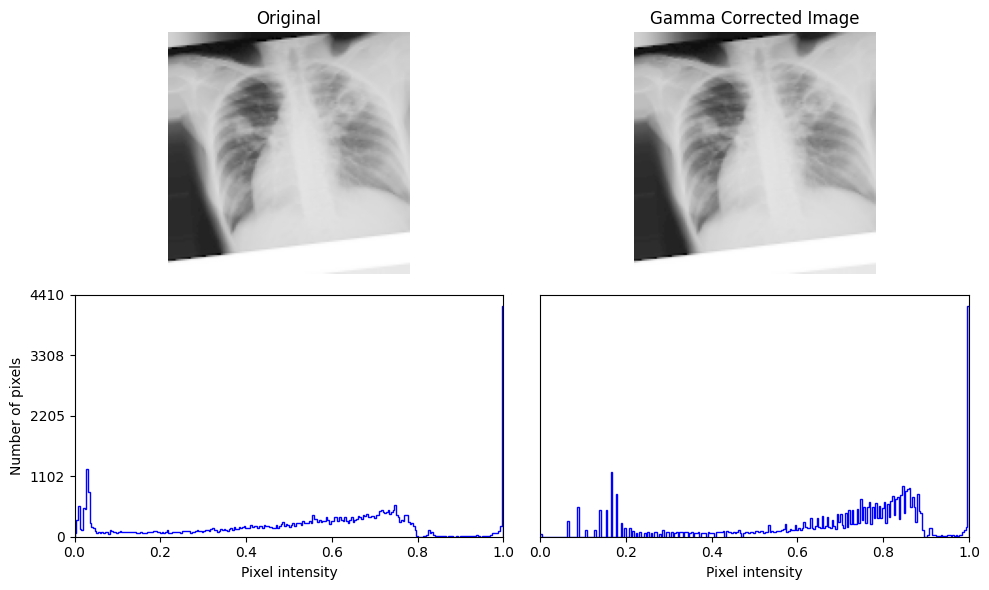

In [13]:
# Display the original and gamma_corrected images side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(gamma_corrected2, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(gamma_corrected2, cmap=plt.cm.gray)
ax[1].set_title('Gamma Corrected Image')
ax[1].set_axis_off()

ax[2].hist(image2.ravel(), bins=256, histtype='step', color='blue')
ax[2].set_xlim(0, 1)
ax[2].set_xlabel('Pixel intensity')
ax[2].set_yticks([])
ax[2].set_ylabel('Number of pixels')
y_min, y_max = ax[2].get_ylim()
ax[2].set_yticks(np.linspace(0, y_max, 5))

ax[3].hist(gamma_corrected2.ravel(), bins=256, histtype='step', color='blue')
ax[3].set_xlim(0, 1)
ax[3].set_xlabel('Pixel intensity')
ax[3].set_yticks([])

plt.tight_layout()
plt.show()

# Loading Images with Keras Utilities

In [14]:
data = tf.keras.utils.image_dataset_from_directory('/home/yuk/Documents/BigProject/Dataset',image_size=(128, 128),batch_size=32,color_mode='grayscale')

Found 3898 files belonging to 2 classes.


2025-04-30 19:32:59.392822: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-30 19:32:59.393172: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-30 19:32:59.393402: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

This turns the TensorFlow dataset data into a NumPy-style iterator, so you can loop through the data and get batches as normal NumPy arrays.

    - We need this because it does not load data directly into the memory , so we just have to use the iterator to convert them into normal numpy array such as ex (x,y)

In [15]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [16]:
batch = data_iterator.next()
# Images represented as a numpy array and labels represented as a numpy array
batch[0].shape , batch[1].shape 

((32, 128, 128, 1), (32,))

class 1 contains TB ,
class 0 Does not contain any TB

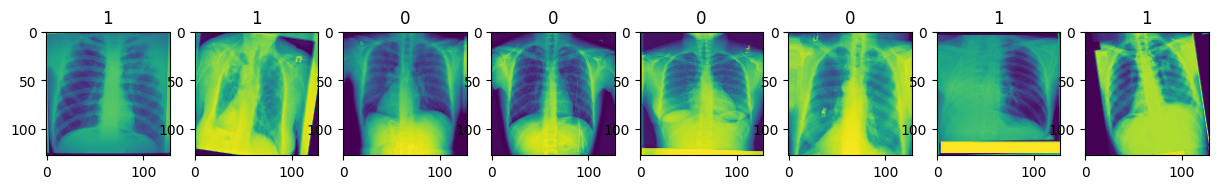

In [17]:
fig , ax = plt.subplots(ncols=8 , figsize=(15,15))
for idx , img in enumerate(batch[0][:8]): # Gets first 8 images
    ax[idx].imshow(img.astype(int))       
    ax[idx].set_title(batch[1][idx]) # Gets the first 8 labels as well

In [18]:
batch[1] # Labels 

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int32)

In [19]:
batch[0].max() # checking the max pixel value

255.0

# CLAHE (Contrast Limited Adaptive Histogram Equalization)

This process improves the contrast in each image, making the details inside the lungs clearer and more visible.

# Normalizing

Adjusting the pixel intensity for better image processing , scaling
the values to [0 , 1]

In [20]:
from tensorflow import keras
tf.config.optimizer.set_jit(True)  

In [21]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [22]:
import tf_clahe
from tensorflow.keras import layers

gpu = True

@tf.function(experimental_compile=True)  # Enable XLA
def fast_clahe(img):
    return tf_clahe.clahe(img, gpu_optimized=True)

def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf_clahe.clahe(tf.cast(image, tf.float32))
    image = image / 255.0
    return image, label

data = data.map(preprocess)

In [23]:
for image, label in data.take(1):
    print("Min pixel value:", tf.reduce_min(image).numpy())
    print("Max pixel value:",tf.reduce_max(image).numpy()) 

Min pixel value: 0.0
Max pixel value: 1.0


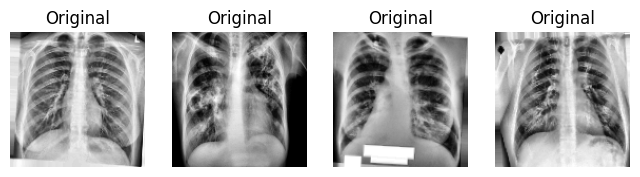

In [24]:
for images, _ in data.take(1):
    plt.figure(figsize=(8, 4))
    for i in range(4):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title('Original')
        plt.axis('off')

In [25]:
import tensorflow_addons as tfa

@tf.function(experimental_compile=True)
def image_sharpening(image, label):
    sharpened = tfa.image.sharpness(image, factor=1.5)
    return sharpened, label

data = data.map(image_sharpening)


# Data Augmentation

In [26]:
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip('horizontal'),
#     tf.keras.layers.Resizing(224, 224),
#     tf.keras.layers.RandomRotation(0.1),
#     tf.keras.layers.RandomZoom(0.1),
#     tf.keras.layers.RandomContrast(0.1),
#     tf.keras.layers.GaussianDropout(0.1),
#     tf.keras.layers.RandomBrightness(0.1), 
#     tf.keras.layers.RandomWidth(0.1),
# ])

# plt.figure(figsize=(10, 7))
# for i in range(9):
#     augmented_image = data_augmentation(batch[0][i])  # Using batch[0] to access images
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_image.numpy().astype("uint8"),cmap='gray')  
#     plt.axis("off")

# CNN Model Training

In [27]:
total_batches = len(data) # ---------> There are 122 , 32 batches 

In [28]:
train_batches = int(total_batches * 0.7)
val_batches = int(total_batches * 0.2)
test_batches = total_batches - train_batches - val_batches

train_data = data.take(train_batches)
val_data = data.skip(train_batches).take(val_batches)
test_data = data.skip(train_batches + val_batches).take(test_batches)

32 → 64 → 128 → 256

In [ ]:
from tensorflow.keras import layers, models ,regularizers
model = models.Sequential()

model.add(layers.Conv2D(16,(3,3),activation='relu',input_shape=(128, 128, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(128, 128, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(64 ,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1 ,activation='sigmoid')) 

In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', 
                       tf.keras.metrics.AUC(name='auc'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

In [ ]:
# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=5, restore_best_weights=True
# )

In [32]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3
)

In [33]:
trainig = model.fit(
    train_data,
    epochs = 20,
    validation_data = val_data,
    callbacks=[early_stop, lr_scheduler]
)

Epoch 1/20


2025-04-30 19:33:08.333499: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2025-04-30 19:33:08.922354: I external/local_xla/xla/service/service.cc:168] XLA service 0x7456ec0ff470 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-04-30 19:33:08.922484: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1746021789.100604    6827 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-04-30 19:33:09.103323: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-04-30 19:33:09.108026: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority u

11/85 [==>...........................] - ETA: 3s - loss: 0.8602 - accuracy: 0.6733 - auc: 0.7387 - precision: 0.6832 - recall: 0.6322

2025-04-30 19:33:17.270641: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


85/85 [==============================] - ETA: 0s - loss: 0.5854 - accuracy: 0.7934 - auc: 0.8744 - precision: 0.8023 - recall: 0.7737

W0000 00:00:1746021820.261796    6673 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2025-04-30 19:33:40.489353: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-04-30 19:33:40.489946: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-04-30 19:33:40.502897: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


85/85 [==============================] - 40s 356ms/step - loss: 0.5854 - accuracy: 0.7934 - auc: 0.8744 - precision: 0.8023 - recall: 0.7737 - val_loss: 1.0594 - val_accuracy: 0.5234 - val_auc: 0.9073 - val_precision: 1.0000 - val_recall: 0.0027 - lr: 1.0000e-04
Epoch 2/20
85/85 [==============================] - 27s 315ms/step - loss: 0.3923 - accuracy: 0.8938 - auc: 0.9570 - precision: 0.8992 - recall: 0.8852 - val_loss: 1.9093 - val_accuracy: 0.5000 - val_auc: 0.9011 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/20
85/85 [==============================] - 27s 316ms/step - loss: 0.3224 - accuracy: 0.9254 - auc: 0.9772 - precision: 0.9236 - recall: 0.9257 - val_loss: 1.4955 - val_accuracy: 0.5534 - val_auc: 0.9116 - val_precision: 1.0000 - val_recall: 0.0829 - lr: 1.0000e-04
Epoch 4/20
85/85 [==============================] - 28s 323ms/step - loss: 0.2661 - accuracy: 0.9449 - auc: 0.9886 - precision: 0.9474 - recall: 0.9403 - val_loss: 0.8927 - val_accu

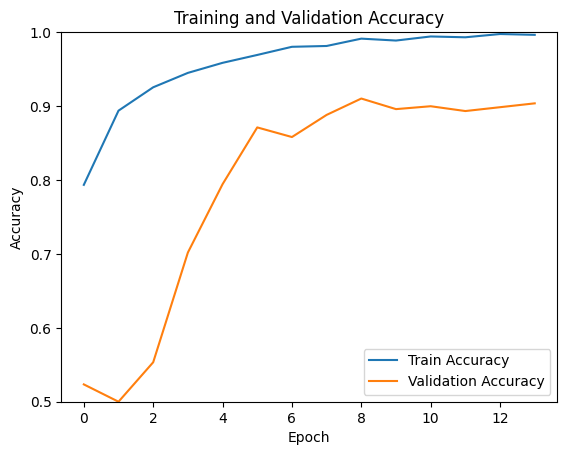

13/13 - 19s - loss: 0.4022 - accuracy: 0.8707 - auc: 0.9824 - precision: 0.9615 - recall: 0.7614 - 19s/epoch - 1s/step


ValueError: too many values to unpack (expected 2)

In [34]:
plt.plot(trainig.history['accuracy'], label='Train Accuracy')
plt.plot(trainig.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

test_loss, test_acc = model.evaluate(test_data, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')